<a href="https://colab.research.google.com/github/alstm1597/ai_colab/blob/main/simple_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# シンプルなディープラーニング
Kerasを使って、最小限のディープラーニングを実装します。

## データの読み込み
Irisデータセットを読み込みます。  
https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [ ]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])  # データを10個表示
print(iris.target[:10])  # ラベルを10個表示
print(iris.data.shape)  # データの形状を表示

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[0 0 0 0 0 0 0 0 0 0]
(150, 4)


## データの前処理
データの前処理として、標準化を行います。  
標準化は、平均値が0、標準偏差が1になるように変換する処理です。  
https://scikit-learn.org/stable/modules/preprocessing.html  
  
ラベルをone-hot表現に変換します。  
one-hot表現は、一箇所だけ1で残りは０の配列です。  
https://keras.io/ja/utils/np_utils/

In [ ]:
from sklearn import preprocessing
from keras.utils import np_utils

scaler = preprocessing.StandardScaler()  # 標準化のためのスケーラー
scaler.fit(iris.data)  # パラメータの計算
i = scaler.transform(iris.data)  # データの変換
print(iris.data[:10])
print(i[:10])
print()
t = np_utils.to_categorical(iris.target)  # ラベルをone-hot表現に変換
print(iris.target)
print(t[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

## 訓練データとテストデータ
データを訓練用のデータとテスト用のデータに分割します。  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train: 訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
i_train, i_test, t_train, t_test = train_test_split(i, t, train_size=0.75)
print(i_train.shape)
print(t_train.shape)
print()
print(i_train[:10])
print(t_train[:10])
print()
print(i_test.shape)
print(t_test.shape)
print()
print(i_test[:10])
print(t_test[:10])

(112, 4)
(112, 3)

[[ 1.89829664e-01 -8.22569778e-01  7.62758269e-01  5.27406285e-01]
 [-5.37177559e-01  7.88807586e-01 -1.16971425e+00 -1.31544430e+00]
 [ 6.74501145e-01 -8.22569778e-01  8.76433123e-01  9.22302838e-01]
 [-1.73673948e-01 -1.31979479e-01  2.51221427e-01  8.77547895e-04]
 [ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [ 1.03800476e+00  5.58610819e-01  1.10378283e+00  1.18556721e+00]
 [-5.25060772e-02 -5.92373012e-01  7.62758269e-01  1.58046376e+00]
 [-9.00681170e-01  1.70959465e+00 -1.28338910e+00 -1.18381211e+00]
 [ 1.15917263e+00 -1.31979479e-01  9.90107977e-01  1.18556721e+00]
 [ 5.53333275e-01 -1.74335684e+00  3.64896281e-01  1.32509732e-01]]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]

(38, 4)
(38, 3)

[[-1.38535265  0.32841405 -1.22655167 -1.3154443 ]
 [ 1.03800476 -0.13197948  0.8195957   1.44883158]
 [-0.53717756  1.47939788 -1.2833891  -1.3154443 ]
 [-0.05250608  2.1

## モデルの構築
4層からなる、シンプルなディープラーニングのモデルを構築します。  
**Sequentilal**: 単純に層を積み重ねるモデル  
https://keras.io/ja/models/sequential/

**Dense**: 全結合層  
https://keras.io/ja/layers/core/#dense  

**Activation**: 活性化関数  
https://keras.io/ja/layers/core/#activation  

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力層のニューロン数は4、中間層のニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加
model.add(Dense(3)) # 3つに分類するので、出力層のニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                160       
_________________________________________________________________
activation_12 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
activation_13 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
_________________________________________________________________
activation_14 (Activation)   (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

## 学習
訓練用の入力データと正解データを使って、モデルを訓練します。  
**fit**: モデルを訓練する  
https://keras.io/ja/models/sequential/#fit  

In [49]:
history = model.fit(i_train, t_train, epochs=50, batch_size=8)

Epoch 1/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8393
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4120 - accuracy: 0.8304
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8482
Epoch 4/50
14/14 [==============================] - 0s 929us/step - loss: 0.3991 - accuracy: 0.8571
Epoch 5/50
14/14 [==============================] - 0s 953us/step - loss: 0.3922 - accuracy: 0.8393
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3859 - accuracy: 0.8571
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3797 - accuracy: 0.8482
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8571
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3678 - accuracy: 0.8571
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3614 - accuracy: 0.8571
Epoch 11/50
14/

## 学習の推移
Historyには学習の経過が記録されています。  
これを使って、学習の推移を表示します。

[0.41924354434013367, 0.411998987197876, 0.4054975211620331, 0.3991079330444336, 0.3921574652194977, 0.3859057128429413, 0.37967994809150696, 0.3732369840145111, 0.3677895665168762, 0.3614301085472107, 0.3552631735801697, 0.3495314419269562, 0.34430524706840515, 0.3386688530445099, 0.3334679901599884, 0.3278167247772217, 0.3246426582336426, 0.31803324818611145, 0.31326165795326233, 0.3076951801776886, 0.30369704961776733, 0.2988497316837311, 0.2929702699184418, 0.2890462577342987, 0.2847978472709656, 0.2806414067745209, 0.2751409411430359, 0.2706061899662018, 0.2661589980125427, 0.2617970407009125, 0.257592111825943, 0.25285086035728455, 0.24911534786224365, 0.2442573457956314, 0.24037328362464905, 0.23680664598941803, 0.23177313804626465, 0.22851422429084778, 0.22420145571231842, 0.220780149102211, 0.21668823063373566, 0.21358227729797363, 0.20879220962524414, 0.20533894002437592, 0.20242735743522644, 0.19849851727485657, 0.19522623717784882, 0.19310793280601501, 0.18947379291057587, 

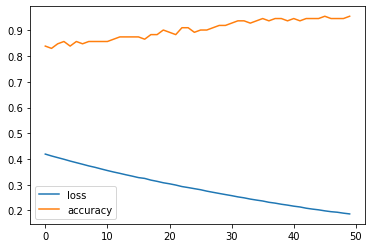

In [51]:
import matplotlib.pyplot as plt

print(hist_loss)
print(hist_acc)
print()
hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 検証用データの誤差

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

## 評価
モデルの評価を行います。  
**evaluate**: 入力、正解データから誤差などを計算します。  
https://keras.io/ja/models/sequential/#evaluate

In [52]:
loss, accuracy = model.evaluate(i_test, t_test)
print(loss, accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.1096 - accuracy: 0.9737
0.10957109183073044 0.9736841917037964


## 予測
学習済みのモデルを使って予測を行います。  
**predict**: モデルを使って入力を出力に変換します。  
https://keras.io/ja/models/sequential/#predict

In [55]:
model.predict(i_test)

array([[9.87495899e-01, 1.23493094e-02, 1.54771362e-04],
       [9.30930255e-05, 3.65580432e-02, 9.63348866e-01],
       [9.90805805e-01, 8.69106781e-03, 5.03195683e-04],
       [9.91764247e-01, 7.55699165e-03, 6.78732875e-04],
       [9.80259717e-01, 1.95632447e-02, 1.77014561e-04],
       [2.52064560e-02, 8.74933362e-01, 9.98602211e-02],
       [9.93516207e-01, 6.10587141e-03, 3.77929828e-04],
       [9.91489179e-03, 9.18462396e-01, 7.16227069e-02],
       [9.88288522e-01, 1.15505662e-02, 1.60933268e-04],
       [9.83394265e-01, 1.64271146e-02, 1.78586008e-04],
       [5.65587019e-04, 7.06542015e-01, 2.92892396e-01],
       [9.91822183e-01, 7.91652780e-03, 2.61284644e-04],
       [1.17113963e-02, 6.52345121e-01, 3.35943490e-01],
       [9.78134632e-01, 2.09061112e-02, 9.59329656e-04],
       [9.76730645e-01, 2.24390496e-02, 8.30262899e-04],
       [9.94406700e-01, 4.98570548e-03, 6.07683382e-04],
       [9.90375340e-01, 9.52055492e-03, 1.04182742e-04],
       [9.83335376e-01, 1.61601

## モデルの保存
学習済みのモデルを保存します。  
**save**: モデルを保存します。  
**load_model**: 保存されたモデルを読み込みます。    
https://keras.io/ja/getting-started/faq/#_4  

In [56]:
from keras.models import load_model

model.save('model.h5')
load_model('model.h5')